In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from json import loads

In [2]:
cases_name = 'example_1_log.json'

with open(cases_name, 'r') as file:
    cases = loads(file.read())
cases = {round(float(step_size), 2): log_name for step_size, log_name in cases.items()}

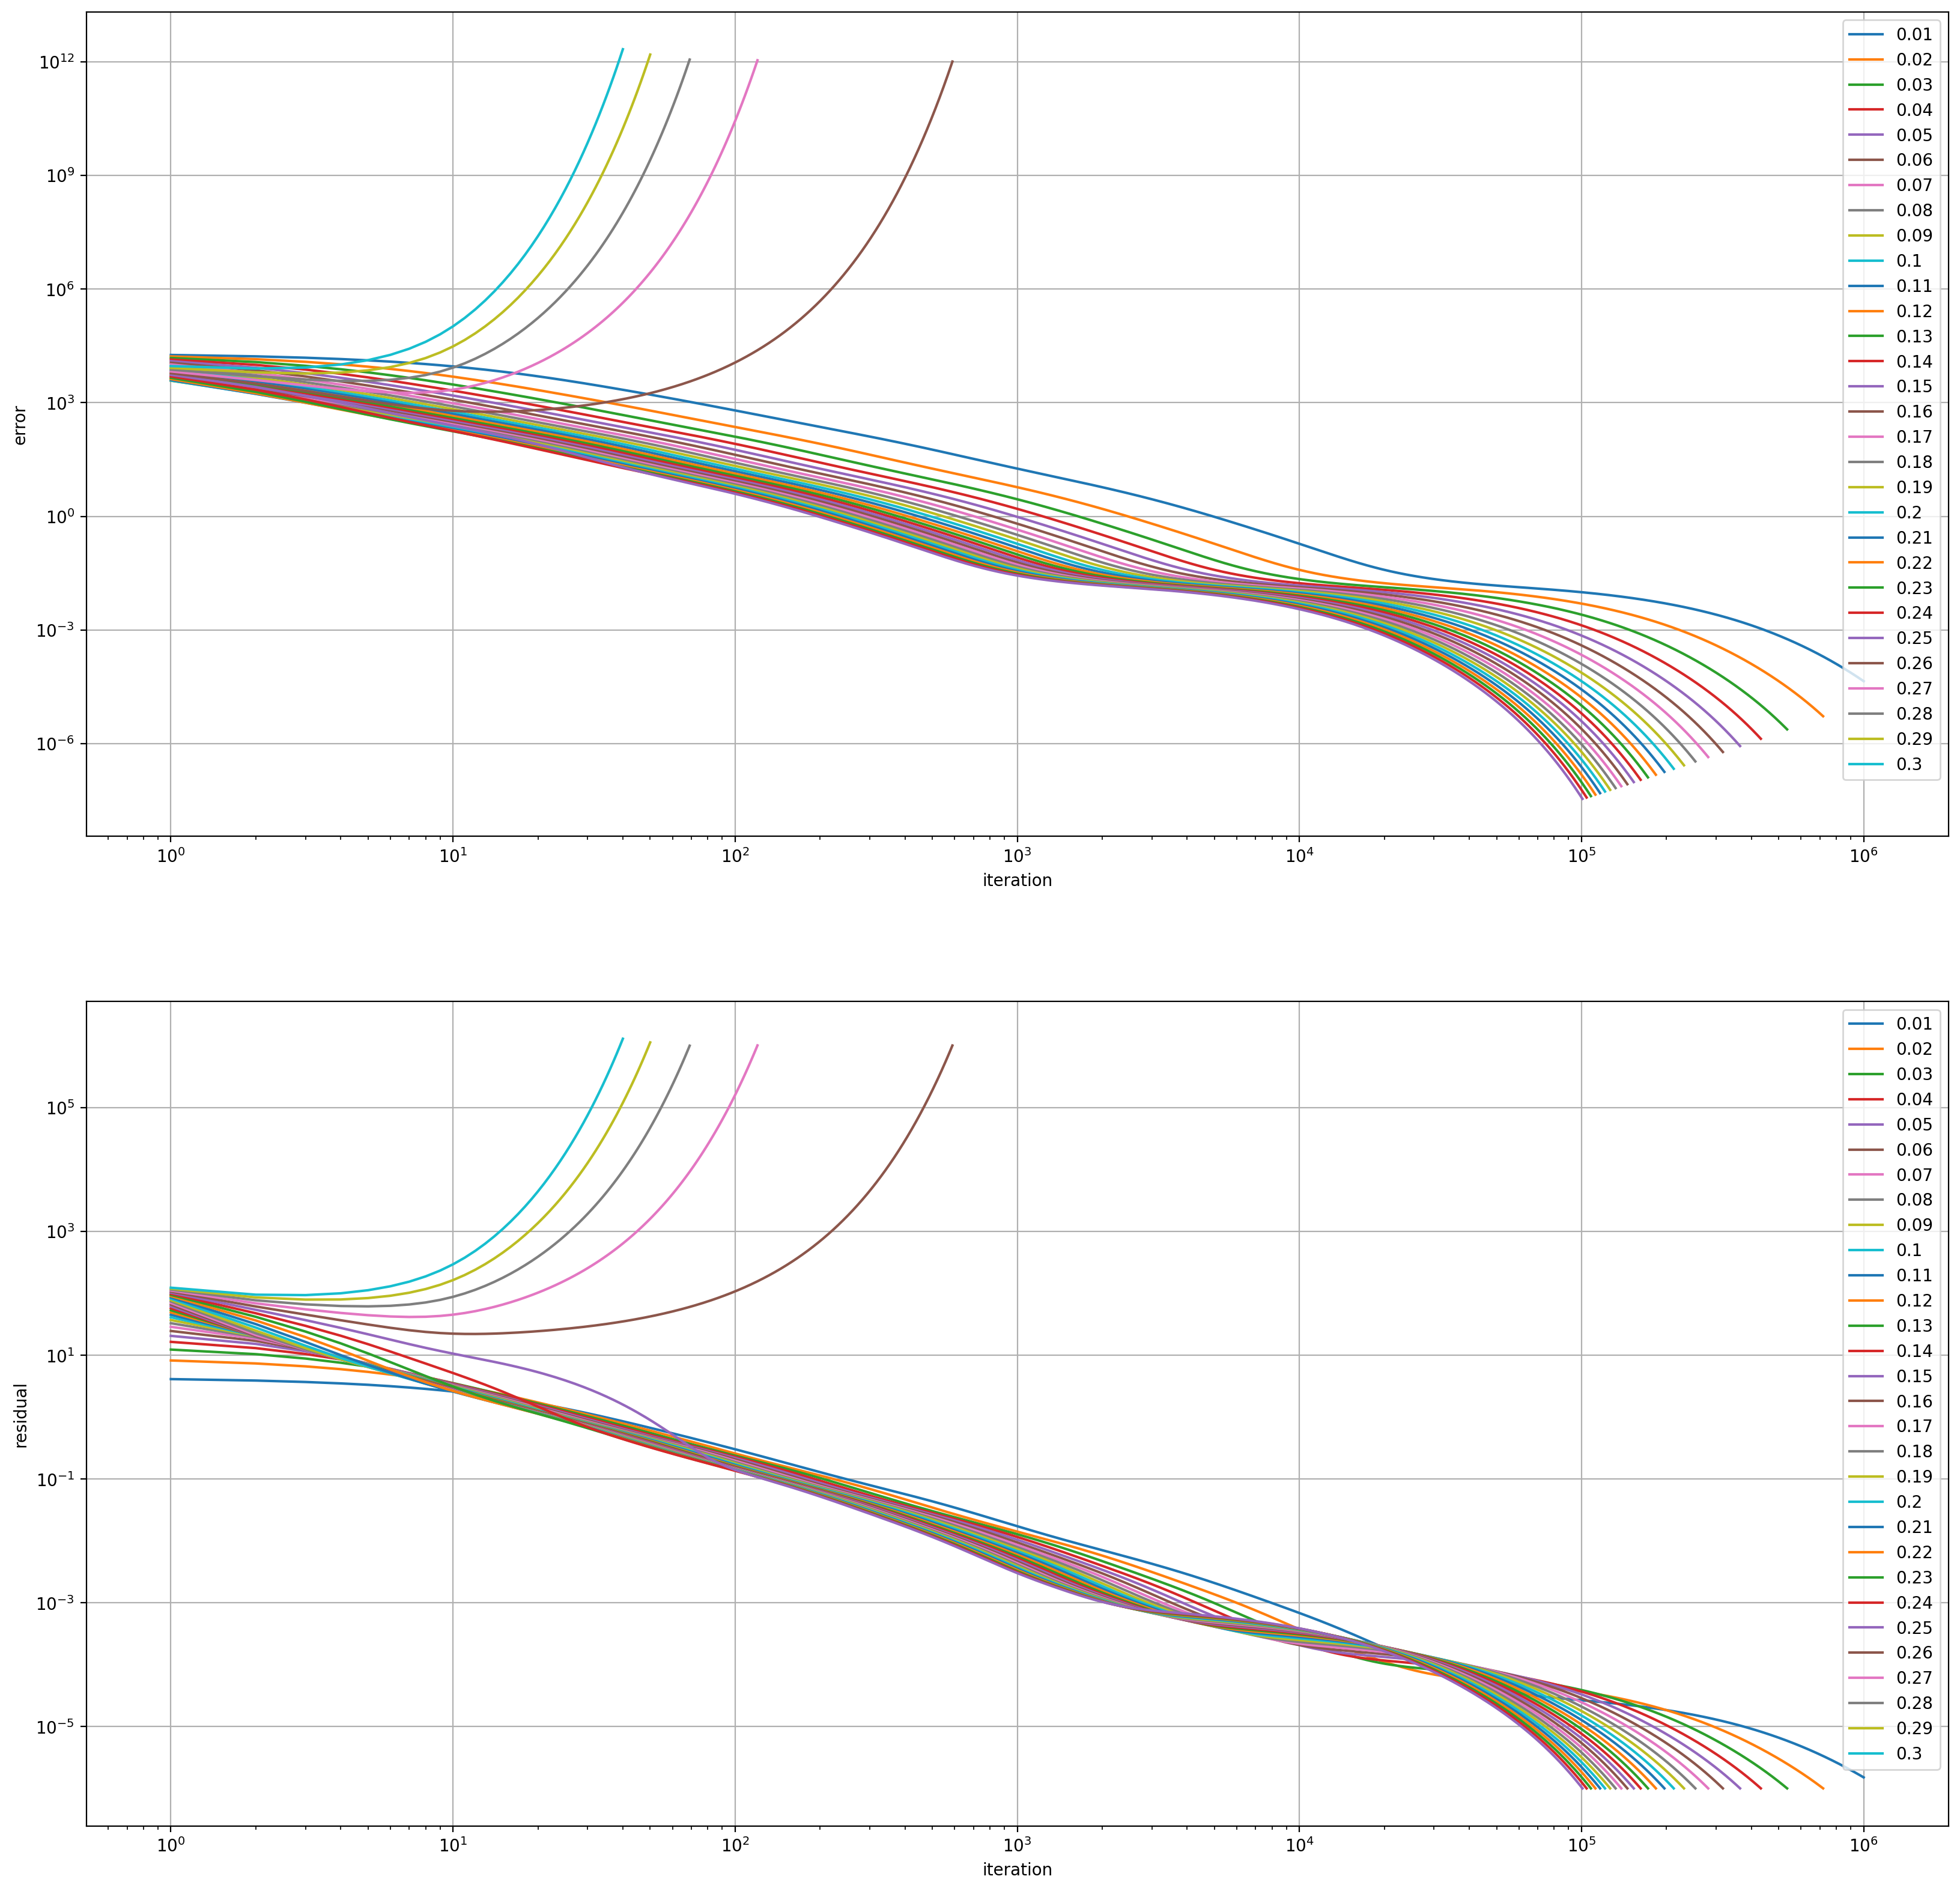

In [3]:
plt.figure(figsize=(20, 20), dpi=200)

for step_size in sorted(cases.keys())[::1]:
    data = pd.read_csv(
        filepath_or_buffer=cases[step_size],
        header=0,
        names=('iteration', 'error', 'residual'),
        index_col=0
    )
    
    plt.subplot(211)
    plt.plot(data['error'], label=str(step_size))
    
    plt.subplot(212)
    plt.plot(data['residual'], label=str(step_size))

plt.subplot(211)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('error')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(212)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('residual')
plt.grid(True)
plt.legend(loc='upper right')
    
plt.show()